# Criando os Nomes

In [2]:
import pandas as pd

In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [4]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [5]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [6]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [7]:
nomes_f.sample(10)

,nome,regiao,freq,rank,sexo
125,BENEDITA,0,128317,126,F
62,FLAVIA,0,232838,63,F
163,REGIANE,0,96432,164,F
78,SILVIA,0,203901,79,F
43,TEREZINHA,0,298311,44,F
9,ALINE,0,509869,10,F
34,CRISTIANE,0,327248,35,F
109,GEOVANA,0,144641,110,F
6,MARCIA,0,551855,7,F
79,MONICA,0,203322,80,F


In [8]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
126,SEBASTIANA,0,128064,127,F
127,TAINA,0,127613,128,F
147,LILIAN,0,108676,148,F
82,SOLANGE,0,199583,83,F
132,GABRIELE,0,122545,133,F


In [9]:
hugo = nomes_m["nome"] == "HUGO"

In [10]:
nomes_m[hugo]

,nome,regiao,freq,rank,sexo
142,HUGO,0,100685,143,M


In [11]:
print(f"Quantidade de nomes: {len(nomes_f) + len(nomes_m)}")

Quantidade de nomes: 400


In [12]:
df = [nomes_f, nomes_m]

In [13]:
df

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [14]:
nomes = pd.concat(df)["nome"].to_frame()

In [15]:
nomes.sample(5)

,nome
194,ODAIR
68,LUIZA
111,TAMIRES
119,MOISES
157,CONCEICAO


## Incluindo IDs

In [16]:
import numpy as np

In [17]:
np.random.seed(123)

In [18]:
total_alunos = len(nomes)

In [19]:
total_alunos

400

In [20]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [21]:
nomes.sample(10)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111
84,SEVERINO,78
104,EVA,13
36,ROBERTO,364
4,ADRIANA,343
67,HENRIQUE,64


In [22]:
dominios = ["@dominiodoemail.com.br", "@servicodoemail.com"]

In [23]:
nomes["dominio"] = np.random.choice(dominios, total_alunos)

In [24]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [25]:
nomes["email"] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [26]:
del nomes["email"]

# Criando a tabela Cursos

In [27]:
!pip3 install html5lib
!pip3 install lxml

In [28]:
import html5lib

In [29]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [30]:
cursos = pd.read_html(url)

In [31]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [32]:
type(cursos)

list

In [33]:
cursos = cursos[0]

In [34]:
type(cursos)

pandas.core.frame.DataFrame

In [35]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


## Alterando Index de Cursos

In [36]:
cursos = cursos.rename(columns={"Nome do curso": "nome_do_curso"})

In [37]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [38]:
cursos["id"] = cursos.index + 1

In [39]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [40]:
cursos = cursos.set_index("id")

In [41]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando os Alunos 

In [42]:
nomes.sample(5)

,nome,id_aluno,dominio
114,ARTHUR,320,@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br


In [43]:
nomes["matriculas"] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [44]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [45]:
import seaborn as sns

C:\Users\hugor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

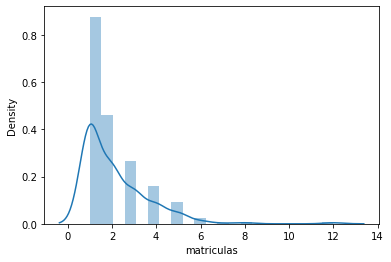

In [46]:
sns.distplot(nomes.matriculas)

In [47]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
8       2
12      2
7       1
Name: matriculas, dtype: int64

## Selecionando Cursos

In [48]:
nomes.sample(5)

,nome,id_aluno,dominio,matriculas
105,MILENA,371,@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,2


In [49]:
todas_matriculas = []

In [50]:
x = np.random.rand(len(cursos))

In [51]:
prob = x / sum(x)

In [52]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ["id_aluno", "id_curso"])

In [53]:
matriculas.head()

,id_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [54]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={"id_aluno": "qtd_alunos"})

,qtd_alunos,nome_do_curso
id_curso,,
1,24,Lógica de programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python
6,32,PHP com MySql
7,56,.NET para web
8,42,Novas integrações com Java
9,60,TDD com Java


In [55]:
nomes.sample(3)

,nome,id_aluno,dominio,matriculas
37,EDSON,123,@servicodoemail.com,1
141,ORLANDO,159,@servicodoemail.com,8
192,ZILDA,237,@servicodoemail.com,1


In [56]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [57]:
matriculas.head()

,id_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [58]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [59]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,24,Lógica de programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python


## Saída em diferentes formatos

In [60]:
matriculas_por_curso.to_csv("matriculas_por_curso.csv")

In [61]:
pd.read_csv("matriculas_por_curso.csv")

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,24,Lógica de programação
1,2,52,Java para Web
2,3,54,C# para Web
3,4,51,Ruby on Rails
4,5,3,Cursos de Python
5,6,32,PHP com MySql
6,7,56,.NET para web
7,8,42,Novas integrações com Java
8,9,60,TDD com Java
9,10,68,Código limpo com C#


In [62]:
matriculas_json = matriculas_por_curso.to_json()

In [63]:
matriculas_json

'{"quantidade_de_alunos":{"1":24,"2":52,"3":54,"4":51,"5":3,"6":32,"7":56,"8":42,"9":60,"10":68,"11":78,"12":21,"13":21,"14":18,"15":57,"16":24,"17":71,"18":60,"19":6,"20":56},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [64]:
matriculas_html = matriculas_por_curso.to_html()

In [65]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>54</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>42</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>60</td>
 

In [67]:
matriculas.to_csv("matriculas.csv", index = False)